# Dimentionality Reduction - LSA

**References:**

https://www.javatpoint.com/dimensionality-reduction-technique

https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8

https://www.analyticsvidhya.com/blog/2021/09/latent-semantic-analysis-and-its-uses-in-natural-language-processing/

### Contents:

1. <a href="#Introduction">Introduction</a>
2. <a href="#Benefits-of-applying-Dimensionality-Reduction">Benefits of applying Dimensionality Reduction</a>
3. <a href="#Disadvantages-of-dimensionality-Reduction">Disadvantages of dimensionality Reduction</a>
4. <a href="#Latent-Semantic-Analysis-(LSA)">Latent Semantic Analysis (LSA)</a>
5. <a href="#Advantages of LSA">Advantages and Disadvantages</a>
6. <a href="#Dimentionality-reduction-using-LDA!">Dimentionality reduction using LDA!</a>


### Introduction

**What is Dimensionality Reduction?**

The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called dimensionality reduction.

A dataset contains a huge number of input features in various cases, which makes the predictive modeling task more complicated. Because it is very difficult to visualize or make predictions for the training dataset with a high number of features, for such cases, dimensionality reduction techniques are required to use.

Dimensionality reduction technique can be defined as, "It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information." These techniques are widely used in machine learning for obtaining a better fit predictive model while solving the classification and regression problems.

It is commonly used in the fields that deal with high-dimensional data, such as speech recognition, signal processing, bioinformatics, etc. It can also be used for data visualization, noise reduction, cluster analysis, etc.

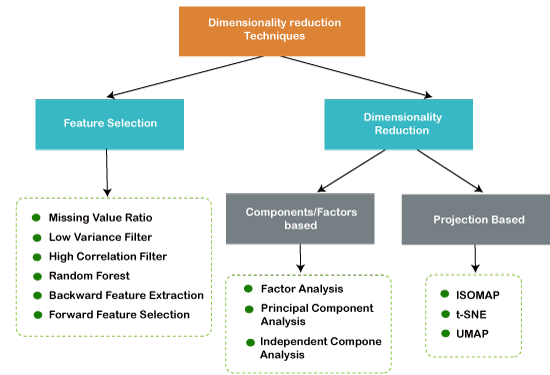

**The Curse of Dimensionality**

Handling the high-dimensional data is very difficult in practice, commonly known as the curse of dimensionality. If the dimensionality of the input dataset increases, any machine learning algorithm and model becomes more complex. As the number of features increases, the number of samples also gets increased proportionally, and the chance of overfitting also increases. If the machine learning model is trained on high-dimensional data, it becomes overfitted and results in poor performance.

Hence, it is often required to reduce the number of features, which can be done with dimensionality reduction.

### Benefits of applying Dimensionality Reduction

Some benefits of applying dimensionality reduction technique to the given dataset are given below:

- By reducing the dimensions of the features, the space required to store the dataset also gets reduced.
- Less Computation training time is required for reduced dimensions of features.
- Reduced dimensions of features of the dataset help in visualizing the data quickly.
- It removes the redundant features (if present) by taking care of multicollinearity.

### Disadvantages of dimensionality Reduction

There are also some disadvantages of applying the dimensionality reduction, which are given below:

Some data may be lost due to dimensionality reduction.
In the PCA dimensionality reduction technique, sometimes the principal components required to consider are unknown.


## Latent Semantic Analysis (LSA)

LSA for natural language processing task was introduced by Jerome Bellegarda in 2005. The objective of LSA is reducing dimension for classification. The idea is that words will occurs in similar pieces of text if they have similar meaning. We usually use Latent Semantic Indexing (LSI) as an alternative name in NLP field.

Text data suffers heavily from high-dimensionality. Latent Semantic Analysis (LSA) is a popular, dimensionality-reduction techniques that follows the same method as Singular Value Decomposition. LSA ultimately reformulates text data in terms of r latent (i.e. hidden) features, where r is less than m, the number of terms in the data.

LSA, which stands for Latent Semantic Analysis, is one of the foundational techniques used in topic modeling. The core idea is to take a matrix of documents and terms and try to decompose it into separate two matrices –

- A document-topic matrix
- A topic-term matrix.

Therefore, the learning of LSA for latent topics includes matrix decomposition on the document-term matrix using Singular value decomposition. It is typically used as a dimension reduction or noise-reducing technique.

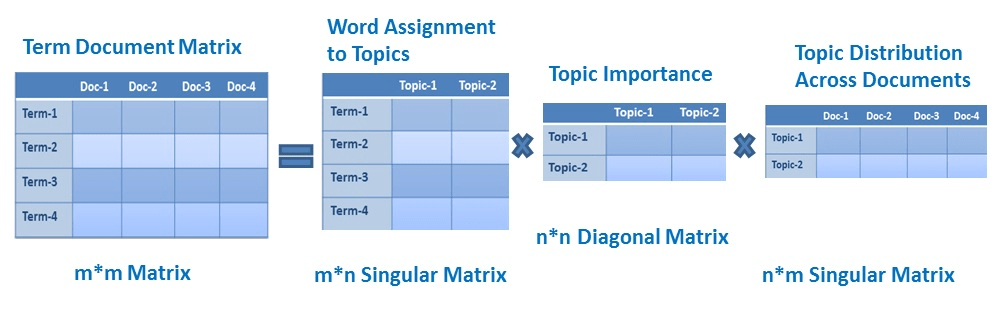

**Advantages and Disadvantages of LSA**

Latent Semantic Analysis can be very useful, but it does have its limitations. It’s important to understand both sides of LSA so you have an idea of when to leverage it and when to try something else.

### Advantages of LSA

1. It is efficient and easy to implement.

2. It also gives decent results that are much better compared to the plain vector space model.

3. It is faster compared to other available topic modeling algorithms, as it involves document term matrix decomposition only.

### Disadvantages of LSA

1. Since it is a linear model, it might not do well on datasets with non-linear dependencies.

2. LSA assumes a Gaussian distribution of the terms in the documents, which may not be true for all problems.

3. LSA involves SVD, which is computationally intensive and hard to update as new data comes up.

4. Lack of interpretable embeddings (we don’t know what the topics are, and the components may be arbitrarily positive/negative)

5. Need for a really large set of documents and vocabulary to get accurate results

6. It provides less efficient representation

### Dimentionality reduction using LDA!

In [1]:
#We will using LSA algorithm for clusturing of different Topics! Lets get into the code!

In [2]:
#Importing the libraries!
import pandas as pd
import os, re

# Read each file as text files and put in a data frame
folders = os.listdir('../../Data/bbc/')
folders

['business', 'entertainment', 'politics', 'README.TXT', 'sport', 'tech']

As can be seen in the output, there is a ‘README.TXT’ file available which is to be discarded. All other elements are the respective folders. Each folder has raw text files on the respective topic as appearing in the name of the folder. The next piece of code will create the data frame.

In [3]:
folders = os.listdir('../../Data/bbc/')

folders.remove('README.TXT')

In [4]:
df_dict = {'topic':[], 'news':[]}

for folder in folders:

    files = os.listdir('../../Data/bbc/'+folder)

    for file in files:

        path = '../../Data/bbc/'+folder+'/'+file

        f = open(path, 'r', errors='ignore').read()

        df_dict['topic'].append(folder)

        df_dict['news'].append(str(f))




df = pd.DataFrame(df_dict)

df.head()

,topic,news
0,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,High fuel prices hit BA's profits\n\nBritish A...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...


The news column contains the texts which require some preprocessing before further analysis. Preprocessing would involve steps like

- Case conversion
- Removal of special characters and numbers (if any)

Using the RE package this processing can be done easily. A convenient function can do preprocessing and, as the data contain news heading, the function will return both the heading as well as the actual news content from individual texts. The codes are given below:

In [5]:
def simple_preprocessing(text):
    heading = re.findall("^.+(?=\n)", text) # Extract the first line as heading
    text = re.sub(heading[0], '', text) # Remove the heading
    text = re.sub('\n', ' ', text) # Replace newline character with whitespace
    text = re.sub('[$(.%),;!?]+','', text) # Remove common punctuations
    text = text.strip() # Remove leading and training whitespaces
    return (heading[0], text)

news_and_heading = [simple_preprocessing(txt.lower()) for txt in df['news']]

In [6]:
df_final = pd.concat([df, pd.DataFrame.from_records(news_and_heading, 

                                                    columns=['Heading','News'])], 

                     axis=1)

Latent semantic analysis (LSA) can be done on the ‘Headings’ or on the ‘News’ column. Since the ‘News’ column contains more texts, we would use this column for our analysis. Since LSA is essentially a truncated SVD, we can use LSA for document-level analysis such as document clustering, document classification, etc or we can also build word vectors for word-level analysis.

**Document Clustering for Latent Semantic Analysis**

Document clustering is helpful in many ways to cluster documents based on their similarities with each other. They are useful in law firms, medical record segregation, segregation of books, and in many different scenarios.  Clustering algorithms are usually meant to deal with dense matrix and not sparse matrix which is created during the creation of document term matrix. Using LSA, a low-rank approximation of the original matrix can be created (with some loss of information although!) that can be used for our clustering purpose. The following codes show how to create the document-term matrix and how LSA can be used for document clustering.

In [7]:
#Importing Libraries!

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KVSH2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopword_list = stopwords.words('english')
dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=2000) # Only top 2000 most frequently ocurring words are considered
dtm.fit(df_final['News'])
dtm_mat = dtm.transform(df_final['News'])

In [10]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)

In [11]:
s_list = []

In [12]:
for clus in tqdm(range(2,21)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:22<00:00,  1.17s/it]


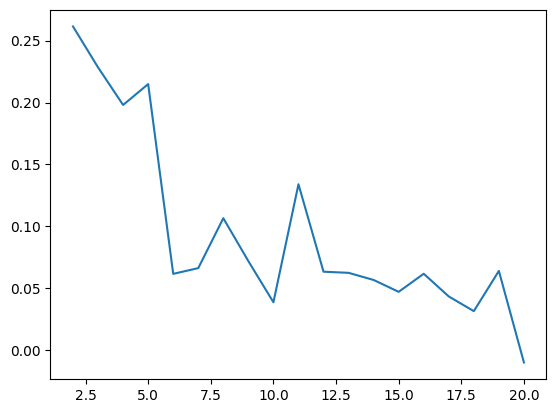

In [13]:
plt.plot(range(2,21), s_list)

plt.show()

The line plot showing Silhouette scores at different numbers of clusters is shown above!

The plot shows clearly that the silhouette scores are quite low. Thus, either the clusters are not linearly separable or there is a considerable amount of overlaps among them. A TSNE plot is better suited in such a case. The TSNE plot extracts a low dimensional representation of high dimensional data through a non-linear embedding method which tries to retain the local structure of the data. The code as well as the TSNE plot is shown below.

In [14]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

c:\program files\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\program files\python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [34]:
tsne_mat_df=pd.DataFrame(tsne_mat,columns=['column1','column2'])

In [35]:
tsne_mat_df.head()

,column1,column2
0,20.830708,30.688068
1,46.166615,25.353815
2,13.868464,57.621815
3,23.249571,34.385574
4,16.984198,23.801876


In [36]:
tsne_mat_df['topic']=df_final['topic']

In [37]:
tsne_mat_df.head()

,column1,column2,topic
0,20.830708,30.688068,business
1,46.166615,25.353815,business
2,13.868464,57.621815,business
3,23.249571,34.385574,business
4,16.984198,23.801876,business


<AxesSubplot: xlabel='column1', ylabel='column2'>

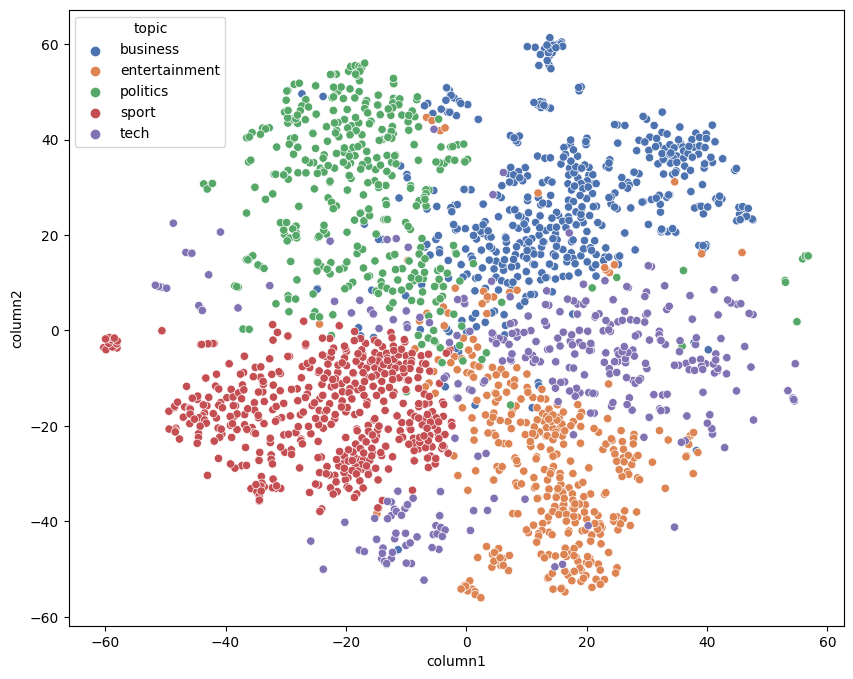

In [38]:
plt.figure(figsize=(10,8))
#sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=df_final['topic'])
#sns.scatterplot(tsne_mat_df[:,0],tsne_mat_df[:,1],hue=tsne_mat_df[:,2])
sns.scatterplot(data=tsne_mat_df, x="column1", y="column2", hue="topic", palette="deep")

In this plot, only the tech-related news article looks like having a much wider spread whereas other news articles look quite nicely clustered. It also suggests that LSA (or Truncated SVD) has done a good job on the textual data to extract 200 important dimensions to segregate news articles on different topics. It is to be understood that TSNE is non-deterministic in nature and multiple runs will produce multiple representations, even though, the structure will be more likely to remain similar if not the same. This LSA can be also used for text queries, for example,

**Query: “How is Microsoft performing in computer game?”**

This query can be sent through the pipeline of document-term matrix creation which would be followed by LSA operation to create the necessary document vector and that can be compared with the vectors of news articles. The following codes show that result:

In [39]:
from sklearn.metrics import pairwise_distances
import numpy as np
query = "How is Microsoft performing in computer game?"
query_mat = tsvd.transform(dtm.transform([query]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='cosine')
df_final['News'][np.argmin(dist.flatten())]

'xbox video game halo 2 has been released in the us on 9 november with a uk release two days later why is the game among the most anticipated of all time  halo is considered by many video game pundits to be one of the finest examples of interactive entertainment ever produced and more than 15 million people worldwide have pre-ordered the sequel a science fiction epic halo centred the action on a human cyborg controlled by the player who had to save his crew from an alien horde after a crash landing on a strange and exotic world contained on the interior surface of a giant ring in space remembrance of things past it was not - but as a slice of schlock science fiction inspired by works such as larry niven\'s ringworld and the film starship troopers it fit the bill perfectly halo stood out from a crowd of similar titles - it was graphically impressive had tremendous audio using dolby digital a decent storyline instant playability and impressive physics  but what marked halo as a classic w

### **Conclusion**

The above outcome shows how correctly LSA could extract the most relevant document. However, as mentioned earlier, there are other word vectors available that can produce more interesting results but, when dealing with relatively smaller data, LSA-based document vector creation can be quite helpful.

[<a href="#Contents:">Back to Content</a>]

In [ ]:
#tested :no errors